In [1]:
import numpy as np
import matplotlib.pyplot as plt
from np_losses import np_entropy, np_cross_entropy, np_binary_cross_entropy
import tensorflow as tf
tf_bce = tf.keras.losses.BinaryCrossentropy()
tf_cce = tf.keras.losses.CategoricalCrossentropy()

In [22]:
## Prepare test space
p = np.linspace(0., 1., 1000) # # class 0 label
num_samples = p.shape[0]

# class 0 label, class 1 label
# y_true = [0., 1.] 
y_true = np.zeros((num_samples, 2))
y_true[:, 1] = 1

y_pred = np.zeros((num_samples, 2))
for i, _p in enumerate(p):
    y_pred[i, :] = np.asarray([_p, 1-_p])

In [23]:
print(y_pred.shape)
y_pred

(1000, 2)


array([[0.      , 1.      ],
       [0.001001, 0.998999],
       [0.002002, 0.997998],
       ...,
       [0.997998, 0.002002],
       [0.998999, 0.001001],
       [1.      , 0.      ]])

## With reduction

In [24]:
bce_loss = np_binary_cross_entropy(y_true, y_pred, reduction="mean")
cce_loss = np_cross_entropy(y_true, y_pred, reduction="mean")

# TensorFlow will do auto reduction, for this expression
tf_bce_loss_reduction = tf_bce(y_true, y_pred).numpy()
tf_cce_loss_reduction = tf_cce(y_true, y_pred).numpy()

print(bce_loss.shape)
print(cce_loss.shape)
print(tf_bce_loss_reduction.shape)
print(tf_cce_loss_reduction.shape)

print(bce_loss * 2)
print(cce_loss)
print(tf_bce_loss_reduction)
print(tf_cce_loss_reduction)

()
()
()
()
1.0306712540498408
0.5153356270249204
1.0100518465042114
1.0107457637786865


## Without reduction

In [25]:
tf_bce_loss = np.zeros(num_samples) # with shape (num_samples,) NOT (num_samples, 2)
tf_cce_loss = np.zeros(num_samples)

# Equivalent as above
for i, _p in enumerate(p):
    tf_bce_loss[i] = tf_bce(y_true[i, :], y_pred[i, :]).numpy()
    tf_cce_loss[i] = tf_cce(y_true[i, :], y_pred[i, :]).numpy()

print(bce_loss.shape)
print(cce_loss.shape)
print(tf_bce_loss.shape)
print(tf_cce_loss.shape)

()
()
(1000,)
(1000,)


In [26]:
bce_loss = np_binary_cross_entropy(y_true, y_pred, reduction=None)
cce_loss = np_cross_entropy(y_true, y_pred, reduction=None)

tf_bce_loss = np.zeros((num_samples, 2))
tf_cce_loss = np.zeros((num_samples, 2))

# Equivalent as above
for i, _p in enumerate(p):
    tf_bce_loss[i, :] = tf_bce(y_true[i, :], y_pred[i, :]).numpy()
    tf_cce_loss[i, :] = tf_cce(y_true[i, :], y_pred[i, :]).numpy()

print(bce_loss.shape)
print(cce_loss.shape)
print(tf_bce_loss.shape)
print(tf_cce_loss.shape)

(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)


In [34]:
ttt = y_pred[i, :]
print(ttt)
print(ttt.shape)
print(ttt.shape[-1])

[1. 0.]
(2,)
2


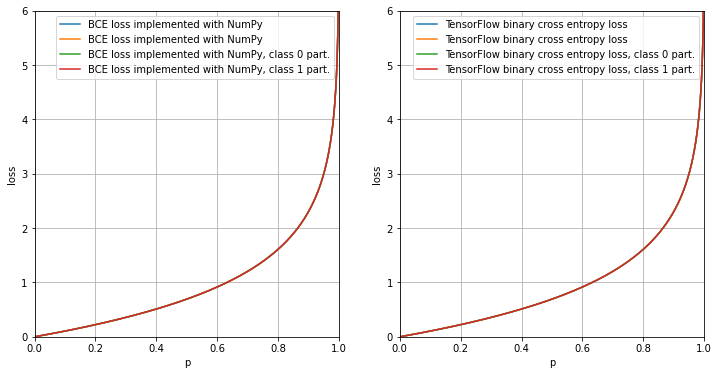

In [31]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(p, bce_loss, label="BCE loss implemented with NumPy")
plt.plot(p, bce_loss[:, 0], label="BCE loss implemented with NumPy, class 0 part.")
plt.plot(p, bce_loss[:, 1], label="BCE loss implemented with NumPy, class 1 part.")
plt.xlabel("p")
plt.ylabel("loss")
plt.xlim(0, 1)
plt.ylim(0, 6) # 16
plt.legend()
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(p, tf_bce_loss, label="TensorFlow binary cross entropy loss")
plt.plot(p, tf_bce_loss[:, 0], label="TensorFlow binary cross entropy loss, class 0 part.")
plt.plot(p, tf_bce_loss[:, 1], label="TensorFlow binary cross entropy loss, class 1 part.")
plt.xlabel("p")
plt.ylabel("loss")
plt.xlim(0, 1)
plt.ylim(0, 6)
plt.legend()
plt.grid()

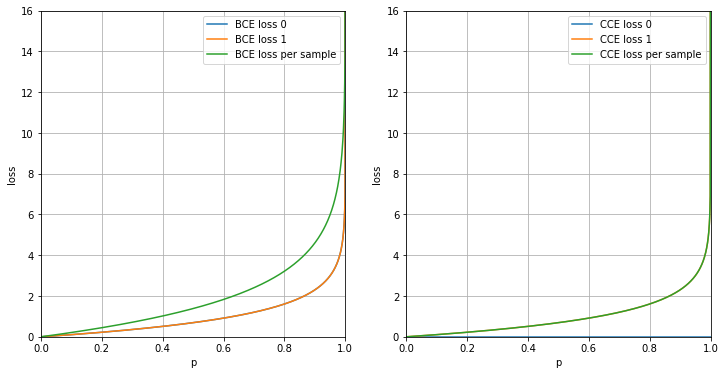

In [28]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(p, bce_loss[:, 0], label="BCE loss 0")
plt.plot(p, bce_loss[:, 1], label="BCE loss 1")
plt.plot(p, bce_loss[:, 0] + bce_loss[:, 1], label="BCE loss per sample")
plt.xlabel("p")
plt.ylabel("loss")
plt.xlim(0, 1)
plt.ylim(0, 16)
plt.legend()
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(p, cce_loss[:, 0], label="CCE loss 0")
plt.plot(p, cce_loss[:, 1], label="CCE loss 1")
plt.plot(p, cce_loss[:, 0] + cce_loss[:, 1], label="CCE loss per sample")
plt.xlabel("p")
plt.ylabel("loss")
plt.xlim(0, 1)
plt.ylim(0, 16)
plt.legend()
plt.grid()

In [9]:
### binary_cross_entropy

In [10]:
logits = np.asarray([0.1, 0.9])
y_true = np.asarray([0., 1.])
np_binary_cross_entropy(logits, y_true)

1.8021826694558576

In [11]:
logits = np.asarray([0.9, 0.1])
y_true = np.asarray([1., 0.])
np_binary_cross_entropy(logits, y_true)

1.8021826694558576

### one hot (categorical)

- binary_cross_entropy
- cross_entropy

In [12]:
logits = np.asarray([0.1, 0.9])
y_true = np.asarray([0., 1.])
cross_entropy(logits, y_true)

NameError: name 'cross_entropy' is not defined

In [11]:
logits = np.asarray([0.9, 0.1])
y_true = np.asarray([1., 0.])
cross_entropy(logits, y_true)

inf

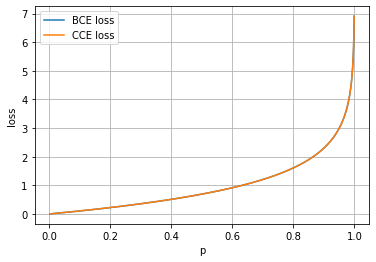

In [12]:
y_true = np.asarray([0., 1.])
p = np.linspace(0.001, 0.999, 1000)
bce_loss = np.zeros(p.shape[0])
cce_loss = np.zeros(p.shape[0])
for i, _p in enumerate(p):
    logits = np.asarray([_p, 1-_p])
    bce_loss[i] = np_binary_cross_entropy(y_true, logits)
    cce_loss[i] = np_cross_entropy(y_true, logits)
# cce_loss2 = 2 * cce_loss
plt.plot(p, bce_loss, label="BCE loss")
plt.plot(p, cce_loss, label="CCE loss")
# plt.plot(p, cce_loss2, label="CCE loss x 2")
plt.xlabel("p")
plt.ylabel("loss")
plt.legend()
plt.grid()

In [13]:
print(p[600], bce_loss[600], cce_loss[600], 2 * cce_loss[600])

0.6003993993993995 0.9172897292043622 0.9172897292043622 1.8345794584087245


### one dim prediction

- binary_cross_entropy
- cross_entropy

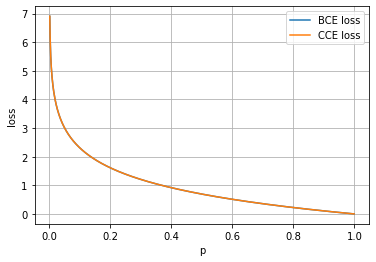

In [14]:
y_true = np.asarray([1.])
p = np.linspace(0.001, 0.999, 1000)
bce_loss = np.zeros(p.shape[0])
cce_loss = np.zeros(p.shape[0])
for i, _p in enumerate(p):
    logits = np.asarray(_p) # [_p, 1-_p]
    bce_loss[i] = binary_cross_entropy(y_true, logits)
    cce_loss[i] = cross_entropy(y_true, logits)
# cce_loss2 = 2 * cce_loss
plt.plot(p, bce_loss, label="BCE loss")
plt.plot(p, cce_loss, label="CCE loss")
# plt.plot(p, cce_loss2, label="CCE loss x 2")
plt.xlabel("p")
plt.ylabel("loss")
plt.legend()
plt.grid()